In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
import sklearn.metrics


# Auxilliary settings for plot
color_pal = sns.color_palette('Dark2')
plt.rcParams['text.color'] = '#000'
plt.rcParams['xtick.color'] = '#000'  
plt.rcParams['ytick.color'] = '#000'  
plt.rcParams['axes.labelcolor'] = '#000' 
plt.style.use('fivethirtyeight')

### Linear Regression Analysis

Objective: To predict the NOx concentration based on the cleaned data utilizing different regression algorithms and identify which among those algorithms has the best model performance:

- Linear Regression Analysis
- Lasso Regression Analysis
- Support Vector Machine (SVM)
- Random Forest Classifier

### Model 1: Linear Regression

In [66]:
# Feature and Target Variables
df = pd.read_csv('data/AirQualityUCI_clean.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Datetime',inplace=True)

Feature and Target Variable Creation

In [67]:
# Separating feature varibales with our target variable (NOx concentration)
X = df.drop(['NOx(GT)'],axis=1)
y = df['NOx(GT)']

In [60]:
# Data Train/Test Split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Model Implementation (Linear Regression)
linear=LinearRegression()
linear.fit(X_train, y_train)
accuracy = linear.score(X_test,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8218201704423906


In [61]:
# Predicting values
y_pred_lm=linear.predict(X_test)
y_pred_lm

array([622.93030907,  -5.71451301, -20.79747633, ..., 306.99388478,
       106.69677852,  16.70298681])

In [62]:
# Creating a dataframe combining the actual and predicted NOx concentration
y_pred_lm = pd.Series(y_pred_lm, name='Predicted NOx')

actual_and_pred = pd.concat([y_test.reset_index(drop=True),y_pred_lm],axis=1)
actual_and_pred.rename(columns={'NOx(GT)':'Actual NOx'},inplace=True)
actual_and_pred.set_index(y_test.index,inplace=True)
actual_and_pred = actual_and_pred.astype(int)

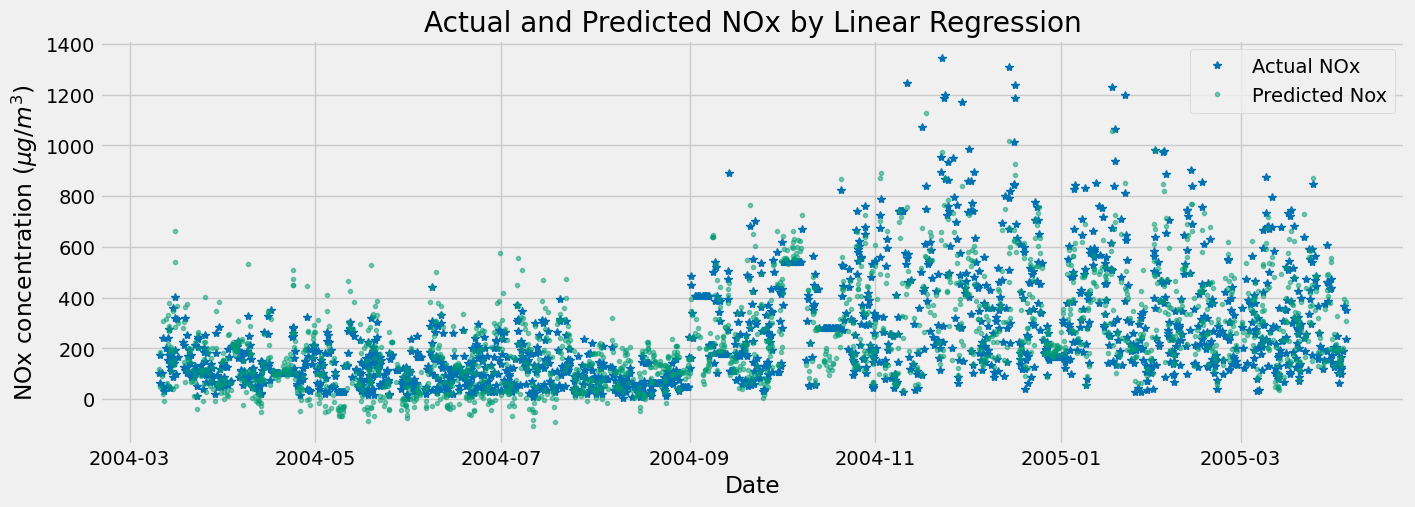

In [68]:
plt.figure(figsize=(15,5))
plt.plot(actual_and_pred.index,actual_and_pred['Actual NOx'],label='Actual NOx',linestyle='',\
    marker='*',color='#0072B2')
plt.plot(actual_and_pred.index,actual_and_pred['Predicted NOx'],label='Predicted Nox',linestyle='',\
    marker='.',color='#009E73',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('NOx concentration ($\mu g/m^3$)')
plt.title('Actual and Predicted NOx by Linear Regression')
plt.legend()
plt.show()

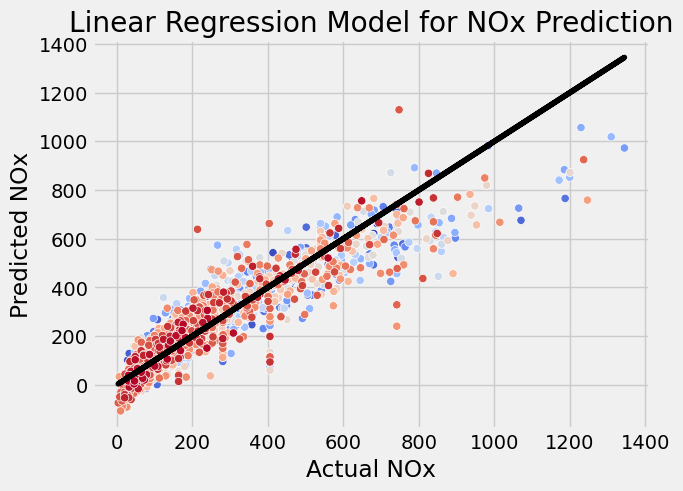

Model Intercept: 107.8924401841555
Mean Squared Error: 7814.679099019422
R-squared (Coefficient of Determination): 0.8218201704423906


In [76]:
sns.scatterplot(actual_and_pred,x='Actual NOx',y='Predicted NOx',hue=actual_and_pred.index,\
    palette='coolwarm',legend=False)
plt.plot(actual_and_pred['Actual NOx'],actual_and_pred['Actual NOx'],color='#000', linestyle='-')
plt.title('Linear Regression Model for NOx Prediction')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
# Model Evaluation: Some metrics to learn about the model
print("Model Intercept:", linear.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test,y_pred_lm))
print("R-squared (Coefficient of Determination):", r2_score(y_test, y_pred_lm))

### Lasso Regression Analysis

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso(alpha = 0.5)
# param={'alpha':[0.1,1,2,5,10]}
# lasso_reg=GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=4)

lasso.fit(X_train,y_train)


In [ ]:
lasso_predict = lasso.predict(X_test)
lasso_predict

In [ ]:
lassostat = [round(mean_squared_error(y_test,lasso_predict),2), round(np.sqrt(mean_squared_error(y_test,lasso_predict)),2),round(r2_score(y_test,lasso_predict),2)]
print('MSE value  {}'.format(lassostat[0]))
print('RMSE value {}'.format(lassostat[1]))
print('R^2 value {}'.format(lassostat[2]))